# CatBoost Regression model WITHOUT miss label

In [ ]:
# import packages 

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# import ML packages 
import catboost as cb
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

import pickle

### Import &amp; split data

In [ ]:
"""
Since Catboost can handle text and not only int input, the dataset is import before its previous split.

"""

'\nSince Catboost can handle text and not only int input, the dataset is import before its previous split.\n\n'

In [ ]:
# import data 

gold_data_model = pd.read_csv("silver_data_model.csv")

In [ ]:
# remove miss label data
i = gold_data_model[gold_data_model.bfe == 123884].index

gold_data_model = gold_data_model.drop(i)

In [ ]:
gold_data_model.head()

,bfe,gov_property_value,gov_land_value,sold_price,unit_sqm_resi,rooms,street_name,street_number,longitude,latitude,building_year,gov_sqm,sold_date,year,month,floor
0,111445,2250000.0,326700.0,6200000,114.0,4,AmagerBoulevard,110,12.593788,55.666513,2018.0,101.0,2022-03-25,2022,3,1.0
1,103789,2100000.0,404900.0,4000000,83.0,2,Weidekampsgade,61,12.581636,55.667398,2006.0,71.0,2022-03-24,2022,3,1.0
2,135089,1350000.0,167400.0,3845000,78.0,4,Marengovej,12,12.621136,55.658203,1935.0,75.0,2022-03-21,2022,3,2.0
3,132821,1050000.0,97500.0,2375000,62.0,2,Elbagade,21,12.613412,55.653728,1932.0,54.0,2022-03-15,2022,3,5.0
4,131622,960000.0,82000.0,2725000,56.0,2,Caprivej,2,12.621147,55.660681,1937.0,53.0,2022-03-15,2022,3,2.0


In [ ]:
# train data 2019-2022.01
train_data_1 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 1)]
train_data_2 = gold_data_model.loc[gold_data_model['year'] <= 2021]

train_data = pd.concat([train_data_1,train_data_2])

# test data 2022.02-2022.03: 
test_data_1 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 2)]

test_data_2 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 3)]

test_data = pd.concat([test_data_1,test_data_2])


# view shape 
print(train_data.shape, test_data.shape)

(3422, 16) (177, 16)


In [ ]:
train_data.max()

bfe                     100179329
gov_property_value        5.4e+06
gov_land_value         1.0214e+06
sold_price                6600000
unit_sqm_resi                 208
rooms                           7
street_name           Østrigsgade
street_number                 305
longitude                 12.6351
latitude                  55.6687
building_year                2021
gov_sqm                       302
sold_date              2022-01-31
year                         2022
month                          12
floor                          14
dtype: object

In [ ]:
train_data.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'sold_price',
       'unit_sqm_resi', 'rooms', 'street_name', 'street_number', 'longitude',
       'latitude', 'building_year', 'gov_sqm', 'sold_date', 'year', 'month',
       'floor'],
      dtype='object')

In [ ]:
# drop col for train
train_data = train_data.drop(columns=[
    #'street_name',
    #'year',
    'sold_date',
    #'bfe'
    ]) 

# drop col for test
test_data = test_data.drop(columns=[
    #'street_name',
    #'year',
    'sold_date',
    #'bfe'
    ]) 

In [ ]:
# split TRAIN and drop target aka. sold_price

X_train = train_data.drop(['sold_price'], axis= 1)
y_train = train_data['sold_price']
print(X_train.shape, y_train.shape)

# split TEST and drop target aka. sold_price

X_test = test_data.drop(['sold_price'], axis= 1)
y_test = test_data['sold_price']
print(X_test.shape, y_test.shape)

(3422, 14) (3422,)
(177, 14) (177,)


In [ ]:
X_train.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'unit_sqm_resi', 'rooms',
       'street_name', 'street_number', 'longitude', 'latitude',
       'building_year', 'gov_sqm', 'year', 'month', 'floor'],
      dtype='object')

## CatBoost

### Default settings

In [ ]:
default_catb = CatBoostRegressor().fit(cb.Pool(X_train, y_train, cat_features= ['street_name']))


1:	learn: 1127656.6044959	total: 50.1ms	remaining: 25s
2:	learn: 1085084.6508553	total: 51.8ms	remaining: 17.2s
3:	learn: 1048383.7363312	total: 53.6ms	remaining: 13.3s
4:	learn: 1010131.9683547	total: 55.3ms	remaining: 11s
5:	learn: 975019.5213633	total: 56.9ms	remaining: 9.42s
6:	learn: 940265.4024695	total: 58.8ms	remaining: 8.34s
7:	learn: 907425.1741236	total: 60.5ms	remaining: 7.5s
8:	learn: 877205.3011326	total: 62.1ms	remaining: 6.84s
9:	learn: 848741.7066477	total: 63.9ms	remaining: 6.32s
10:	learn: 821918.6673714	total: 65.6ms	remaining: 5.89s
11:	learn: 795546.4677451	total: 67.3ms	remaining: 5.54s
12:	learn: 770704.7262446	total: 68.9ms	remaining: 5.23s
13:	learn: 745685.4050250	total: 70.6ms	remaining: 4.97s
14:	learn: 722017.7949836	total: 72.3ms	remaining: 4.75s
15:	learn: 700959.7685688	total: 74ms	remaining: 4.55s
16:	learn: 679915.5706628	total: 75.7ms	remaining: 4.38s
17:	learn: 660350.4122977	total: 77.5ms	remaining: 4.23s
18:	learn: 642389.0989657	total: 79.3ms	rem

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred_default_catb = default_catb.predict(X_test) # predicted values 

r2_default_catb = round(metrics.r2_score(y_true, y_pred_default_catb), 4)
mae_default_catb = round(metrics.mean_absolute_error(y_true, y_pred_default_catb),2)
mape_default_catb = round(metrics.mean_absolute_percentage_error(y_true, y_pred_default_catb),4)

eval_dict_default_catb = {'R2': r2_default_catb, 'MAE': mae_default_catb, 'MAPE': mape_default_catb}
eval_default_catb = pd.DataFrame.from_dict(eval_dict_default_catb, orient='index').transpose()

eval_default_catb

,R2,MAE,MAPE
0,0.9461,202659.22,0.0571


In [ ]:
default_catb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0

### Stooooop - Gridsearch

In [ ]:

catb_model = CatBoostRegressor()

parameters = {
    'depth'         : [6],
    'iterations'    : [18000, 19000, 20001]
    }

grid_model = GridSearchCV(
    estimator=catb_model, 
    param_grid = parameters, 
    cv = 3, 
    verbose = 100)
    
grid_model.fit(X_train, y_train, cat_features=['street_name'] )

18001:	learn: 137962.5138238	total: 28.9s	remaining: 1.6s
18002:	learn: 137957.2370636	total: 28.9s	remaining: 1.6s
18003:	learn: 137955.4720192	total: 28.9s	remaining: 1.6s
18004:	learn: 137944.6475616	total: 28.9s	remaining: 1.6s
18005:	learn: 137940.9828548	total: 28.9s	remaining: 1.59s
18006:	learn: 137938.8595973	total: 28.9s	remaining: 1.59s
18007:	learn: 137932.8100798	total: 28.9s	remaining: 1.59s
18008:	learn: 137931.1844436	total: 28.9s	remaining: 1.59s
18009:	learn: 137928.8848359	total: 28.9s	remaining: 1.59s
18010:	learn: 137926.1537195	total: 28.9s	remaining: 1.59s
18011:	learn: 137922.1182577	total: 28.9s	remaining: 1.58s
18012:	learn: 137914.5092872	total: 28.9s	remaining: 1.58s
18013:	learn: 137908.7034030	total: 28.9s	remaining: 1.58s
18014:	learn: 137905.4773910	total: 28.9s	remaining: 1.58s
18015:	learn: 137903.6915973	total: 28.9s	remaining: 1.58s
18016:	learn: 137898.9074024	total: 28.9s	remaining: 1.58s
18017:	learn: 137897.1668426	total: 28.9s	remaining: 1.57s
1

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f8c33bc35f8>,
             param_grid={'depth': [6], 'iterations': [18000, 19000, 20001]},
             verbose=100)

In [ ]:

print("\n The best estimator across ALL searched params:\n", grid_model.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_model.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_model.best_params_)



 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9093325342122137

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 20001}


### Stooop building model with best param

In [ ]:
# hot one encoded setup - only run if its needed
"""
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
"""

"""
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
"""

'\nX_train = pd.read_csv("X_train.csv")\ny_train = pd.read_csv("y_train.csv")\n\nX_test = pd.read_csv("X_test.csv")\ny_test = pd.read_csv("y_test.csv")\n'

In [ ]:
train_dataset = cb.Pool(X_train, y_train, cat_features=['street_name']) 
test_dataset = cb.Pool(X_test, y_test, cat_features= ['street_name'])

cat_model = cb.CatBoostRegressor(
    eval_metric = 'MAE',  
    n_estimators= 20000, 
    depth =6).fit(
        train_dataset,
        verbose=1000)

Learning rate set to 0.004354
0:	learn: 1003112.5815221	total: 2.39ms	remaining: 47.8s
1000:	learn: 235494.4076502	total: 1.62s	remaining: 30.8s
2000:	learn: 202955.9316504	total: 3.16s	remaining: 28.4s
3000:	learn: 184693.5593598	total: 4.69s	remaining: 26.6s
4000:	learn: 172673.6202627	total: 6.23s	remaining: 24.9s
5000:	learn: 163066.5104491	total: 7.78s	remaining: 23.3s
6000:	learn: 155139.0754906	total: 9.31s	remaining: 21.7s
7000:	learn: 148621.9206990	total: 10.9s	remaining: 20.2s
8000:	learn: 142839.3702350	total: 12.4s	remaining: 18.6s
9000:	learn: 137525.8104272	total: 13.9s	remaining: 17s
10000:	learn: 132837.0104219	total: 15.4s	remaining: 15.4s
11000:	learn: 128549.4381567	total: 17s	remaining: 13.9s
12000:	learn: 124529.2622433	total: 18.5s	remaining: 12.3s
13000:	learn: 120809.0835250	total: 20s	remaining: 10.8s
14000:	learn: 117290.7871290	total: 21.5s	remaining: 9.23s
15000:	learn: 113972.7743426	total: 23.1s	remaining: 7.68s
16000:	learn: 110868.7948566	total: 24.6s	r

### Evaluate 

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred = cat_model.predict(X_test) # predicted values 

r2 = round(metrics.r2_score(y_true, y_pred), 4)
mae = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict = {'R2': r2, 'MAE': mae, 'MAPE': mape}
eval_df = pd.DataFrame.from_dict(eval_dict, orient='index').transpose()

eval_df

,R2,MAE,MAPE
0,0.9489,196390.4,0.0559


In [ ]:
# save results to csv

df_results = X_test
df_results['y_true'] = y_true
df_results['y_pred'] = y_pred
df_results.to_csv("cat_results.csv", index=False)

### Feature Importance

In [ ]:
# the bult-in function
np.array(cat_model.get_feature_importance(prettified=True))

array([['gov_property_value', 26.337689472780212],
       ['unit_sqm_resi', 17.535087085617953],
       ['latitude', 11.06977978558623],
       ['gov_sqm', 9.81753048124906],
       ['year', 9.382829494174933],
       ['rooms', 5.092272970569035],
       ['longitude', 3.6581381199637684],
       ['floor', 3.234860229251799],
       ['bfe', 2.8827192145986085],
       ['street_name', 2.6250067194059197],
       ['gov_land_value', 2.4913073024986443],
       ['month', 2.0587521769307378],
       ['building_year', 2.0420591143490636],
       ['street_number', 1.7719678330240345]], dtype=object)

In [ ]:
# loss function change. If a feature is minus it can be removed. But here all features have an influence on the loss

np.array(cat_model.get_feature_importance(
    train_dataset,
    'LossFunctionChange',
    prettified=True))

array([['gov_property_value', 257124.16993965235],
       ['unit_sqm_resi', 168154.35028623257],
       ['year', 138001.3981631101],
       ['gov_sqm', 132257.2013861553],
       ['latitude', 104805.28090196036],
       ['rooms', 70598.6880904038],
       ['floor', 47985.29628245899],
       ['longitude', 34365.15119308469],
       ['month', 30776.67103291853],
       ['bfe', 19945.7096133061],
       ['gov_land_value', 18202.397868314292],
       ['building_year', 12253.792972392781],
       ['street_number', 9633.331484640279],
       ['street_name', 6604.496927210945]], dtype=object)

In [ ]:
# use feature_importances_, which is similar to the built-in function

feature_scores = pd.Series(cat_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

gov_property_value    26.337689
unit_sqm_resi         17.535087
latitude              11.069780
gov_sqm                9.817530
year                   9.382829
rooms                  5.092273
longitude              3.658138
floor                  3.234860
bfe                    2.882719
street_name            2.625007
gov_land_value         2.491307
month                  2.058752
building_year          2.042059
street_number          1.771968
dtype: float64

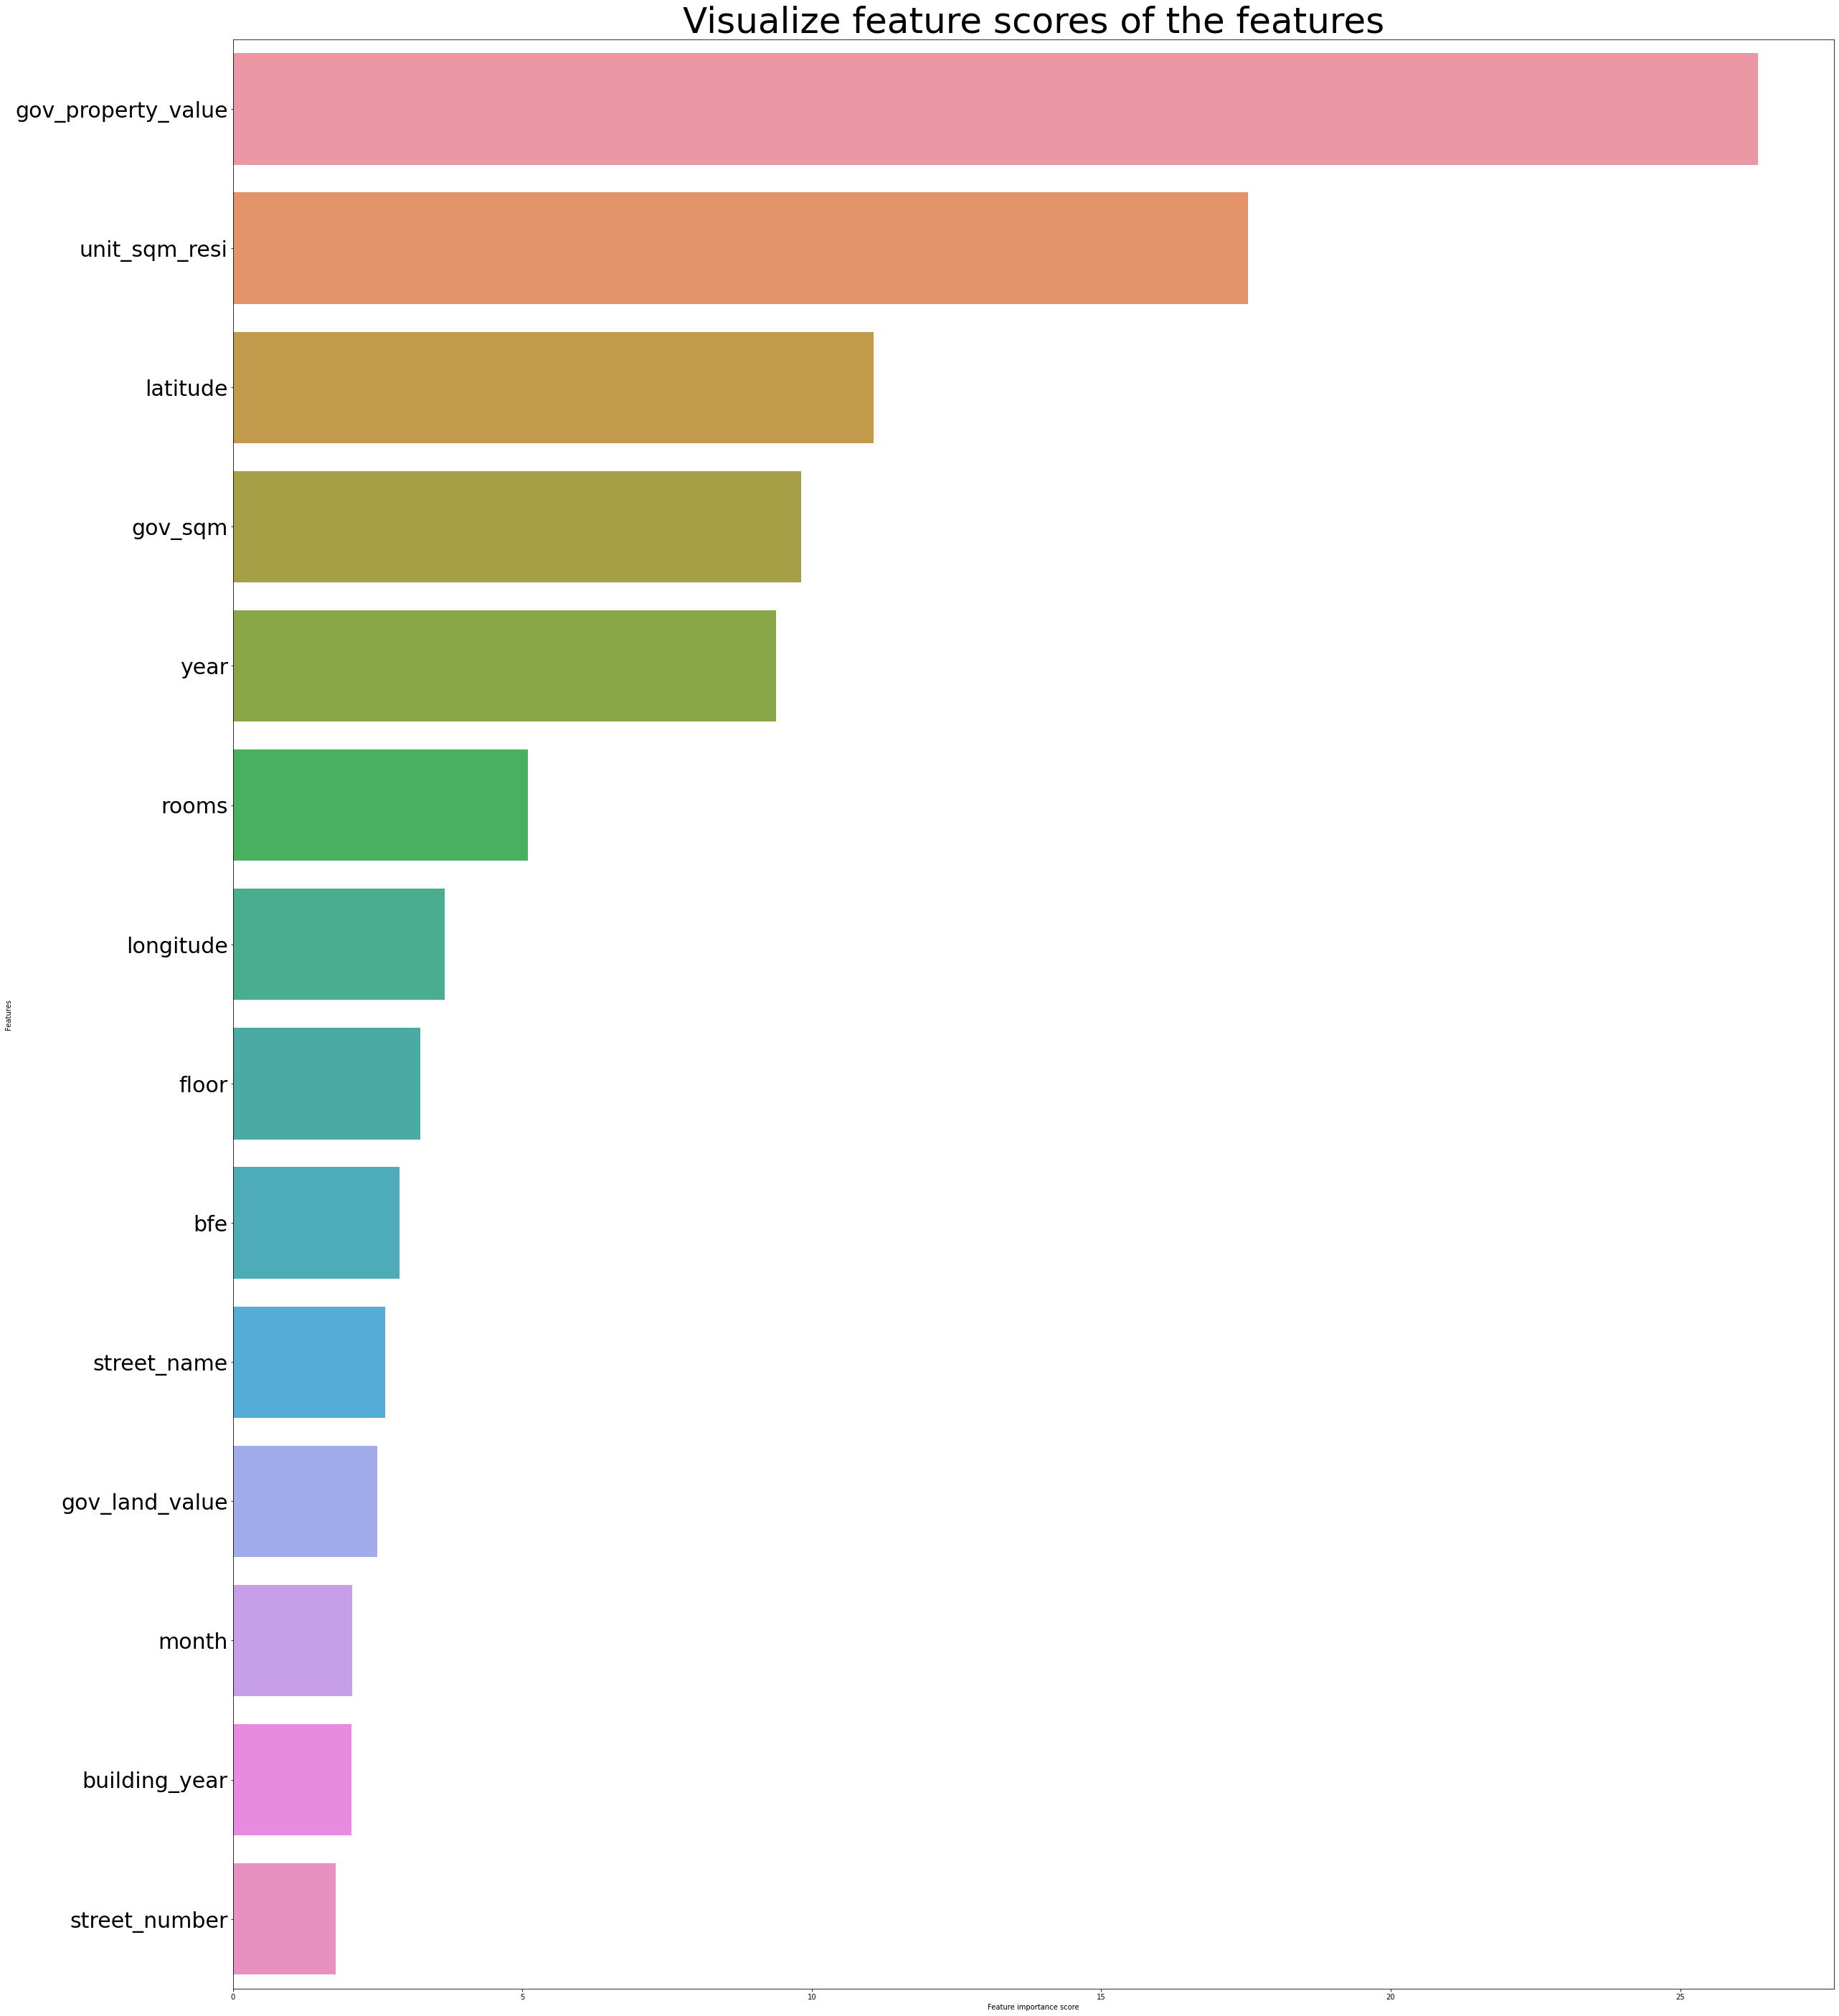

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(40, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features", fontsize=50)
ax.set_yticklabels(feature_scores.index, fontsize=30)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Save model

In [ ]:
#save model to folder
with open('cat_model_pkl', 'wb') as files:
    pickle.dump(cat_model, files)

In [ ]:
# load saved model
"""
with open('cat_model_pkl' , 'rb') as f:
    cat_model = pickle.load(f)
"""
#cat_model.predict()

"\nwith open('cat_model_pkl' , 'rb') as f:\n    cat_model = pickle.load(f)\n"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>